In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import shapiro
from scipy import stats
import scipy
from statsmodels.stats.proportion import proportions_ztest

import warnings 
warnings.filterwarnings('ignore')

# 1. 정규성 검정

1-sample 데이터

In [23]:
ds_camshaft = pd.read_csv("./실습화일/1 Big Data 분석 기초/camshaft.csv")

data1 = ds_camshaft['Supp1']
print(stats.shapiro(data1))

# 정규성 검정  같은내용
statistic, p = stats.shapiro(ds_camshaft['Supp1'])
print('Shapiro-Wilk Test : statistic: {}, p={}'.format(statistic,p))

ShapiroResult(statistic=0.9788166284561157, pvalue=0.1074606254696846)
Shapiro-Wilk Test : statistic: 0.9788166284561157, p=0.1074606254696846


2-sample 데이터

In [24]:
ds = pd.read_csv("./실습화일/1 Big Data 분석 기초/2sample_t_test.csv")
display(ds.head())


# Mat_A 변수의 정규성 검정
statistic, p_value = stats.shapiro(ds['Mat_A'])
print(statistic)
print('Mat_A Shapiro-Wilk 검정 결과 - statistic: %.3f, p-value: %.3f' % (statistic, p_value))

# Mat_B 변수의 정규성 검정
statistic, p_value = stats.shapiro(ds['Mat_B'])
print('Mat_B Shapiro-Wilk 검정 결과 - statistic: %.3f, p-value: %.3f' % (statistic, p_value))

,Mat_A,Mat_B,Total,Sub
0,73.4,68.7,73.4,1
1,77.0,71.4,77.0,1
2,73.7,69.8,73.7,1
3,73.3,75.3,73.3,1
4,73.1,71.3,73.1,1


nan
Mat_A Shapiro-Wilk 검정 결과 - statistic: nan, p-value: 1.000
Mat_B Shapiro-Wilk 검정 결과 - statistic: nan, p-value: 1.000


# 2. 1-Sample t-test

statistic=0.9331594705581665, p=0.4796782433986664
1-Sample t-test
t 통계량: [0.864]
p-value: [0.41]


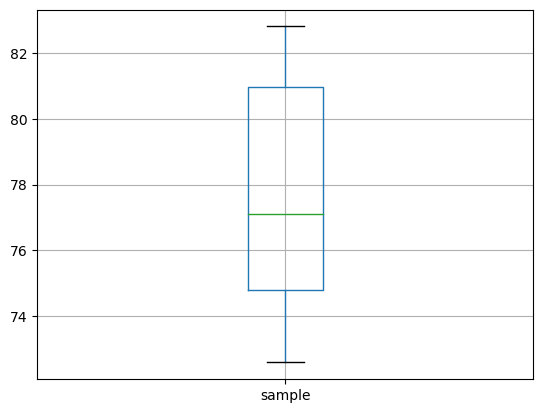

In [25]:
df = pd.DataFrame({'sample':[74.5, 81.2, 73.8, 82.0, 76.3, 75.7, 80.2, 72.6, 77.9, 82.8]})
df.boxplot(['sample'])

#정규성 검정
statistic, p = stats.shapiro(df['sample'])
print("statistic={}, p={}".format(statistic,p))

# 1-Sample ttest
t_result = stats.ttest_1samp(df,76.7)
t, p = t_result.statistic.round(3),t_result.pvalue.round(3)

print("1-Sample t-test")
print("t 통계량: {}".format(t))
print("p-value: {}".format(p))

결론 : 검정결과 P값이 0.41 이므로 개선활동이 고객만족도 변화를 시켰다고 할 수 없다.

# 3. 2-Sample t-test

statistic=0.9094840288162231, p=0.06230909377336502
statistic=0.8978102207183838, p=0.03752618283033371
2-sample t-test
t: -3.122
p: 0.003


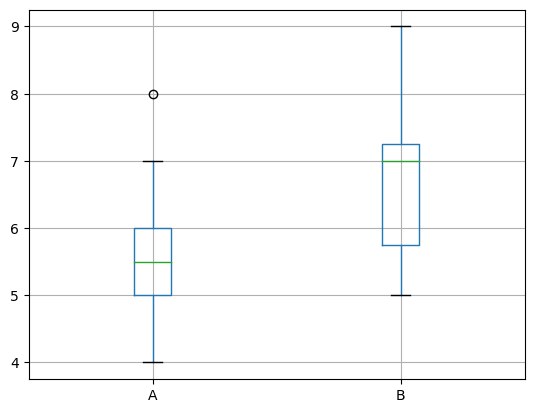

In [26]:
df = pd.DataFrame({'A':[6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7],
                  'B':[7,5,7,8,7,8,8,5,7,6,5,5,6,6,5,7,9,7,7,8]})
df.boxplot(['A','B'])

#정규성 검정
statistic, p = stats.shapiro(df['A'])
print("statistic={}, p={}".format(statistic,p))
statistic, p = stats.shapiro(df['B'])
print("statistic={}, p={}".format(statistic,p))

# 등분산성 검정
stats.bartlett(df['A'],df['B'])

# 2-Sample t-test
t_result = stats.ttest_ind(df['A'], df['B'])
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-sample t-test")
print("t: {}".format(t))
print("p: {}".format(p))

검정결과 P값이 0.003이므로 고객간의 고객만족도의 차이가 있다.

# 4. paired t-test

In [27]:
df1 = pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648]})
df2 = pd.DataFrame({'after':[810,670,790,712,810,670,790,712,790,712]})

t_result = stats.ttest_rel(df1, df2)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("Paired t-test")
print("t: {}".format(t))
print("p: {}".format(p))

Paired t-test
t: [-5.324]
p: [0.]


검정결과 P값이 0.000 이므로 학원 수강 전후의 점수는 차이가 있다고 할 수 있다.

# 5. 1 proportion test

In [28]:
count = 15
n_obs = 100
value = 0.1

stat, pval = proportions_ztest(count, n_obs, value)

print("1 proportion test")
print("z: {0:0.3f}".format(stat))
print("p: {0:0.3f}".format(pval))

1 proportion test
z: 1.400
p: 0.161


결과적으로 고급강 A제품에 대해 품질개선 결과 기존 대비 사용비율이 차이가 있다고 할 수 없다.

# 6. 2 proportion test

In [29]:
count = np.array([4,1])
nobs = np.array([1000,1200])

stat, pval = proportions_ztest(count, nobs)

print("2 proportion test")
print("z: {0:0.3f}".format(stat))
print("p: {0:0.3f}".format(pval))

2 proportion test
z: 1.553
p: 0.120


P-Value>0.05 이므로 두 공장의 불량률은 차이가 있다고 할 수 없다

# 7. chi-square test

In [30]:
# 카이제곱 검정은 관찰된 빈도와 기대되는 빈도 사이의 차이를 평가하여 분포의 적합도를 평가하는 반면,
# proportions_ztest는 두 그룹의 비율 차이를 평가합니다.

In [31]:
df = pd.DataFrame({'Work_1':[270,228,277], 'Work_2':[260,285,284],
                   'Work_3':[236,225,231], 'Work_4':[234,262,208]})

chi, pval, dof, expected = stats.chi2_contingency(df)

print("카이제곱 검정")
print("chisq: {0:0.3f}".format(chi))
print("p: {0:0.3f}".format(pval))
print("degree of freedom: {}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

카이제곱 검정
chisq: 13.366
p: 0.038
degree of freedom: 6
expected value: 
[[258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]]


근무조별로 제품을 생산하는 부하 차이가 있다고 할 수 있다

# 8. ANOVA test

In [33]:
df = pd.DataFrame({'A':[892,623,721,678,723,790,720,670,690,771],
                  'B':[721,821,910,678,723,790,711,790,745,891],
                  'C':[621,915,888,721,894,834,841,912,845,889]})

# 정규성 검정
statistic, p = stats.shapiro(df['A'])
print('Shapiro-Wilk Test : statistic: {}, p={}'.format(statistic,p))
statistic, p = stats.shapiro(df['B'])
print('Shapiro-Wilk Test : statistic: {}, p={}'.format(statistic,p))
statistic, p = stats.shapiro(df['C'])
print('Shapiro-Wilk Test : statistic: {}, p={}'.format(statistic,p))

# 등분산성 검정 : Levene Test
stats.levene(df['A'],df['B'],df['C'])

# ANOVA 실행
f_result = stats.f_oneway(df['A'],df['B'],df['C'])
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)


print("타입 별 One-way")
print("F 통계량: {}".format(f))
print("p-value: {}".format(p))

Shapiro-Wilk Test : statistic: 0.9293239712715149, p=0.4412756860256195
Shapiro-Wilk Test : statistic: 0.924264669418335, p=0.39389991760253906
Shapiro-Wilk Test : statistic: 0.7892211675643921, p=0.010720876976847649
타입 별 One-way
F 통계량: 4.263
p-value: 0.025


검정결과 P값이 0.025이므로 그룹 간의 평균 차이가 있다고 할 수 있다

# 9. Correlation Coefficient(상관계수)

In [35]:
df1 = [1,2,3,4,4,5,6,6,7,8]
df2 = [23,29,49,64,74,87,96,97,109,119]

corr, pval = stats.pearsonr(df1, df2)

print("Correlation Analysis")
print("corr: {0:0.3f}".format(corr))
print("p-value: {0:0.3f}".format(pval))

Correlation Analysis
corr: 0.989
p-value: 0.000


부품수리시간과 부품수간에 "매우 강한 상관성" 이 있다고 할 수 있다